# Vector space model

## Contents

1. [Term_document_matrix](#Term_document_matrxi)
1. [Distance_functions](#Distance_functions)
1. [Matrix_reweigthing](#Matrix_reweigthing)
1. [Resources](#Resources)
1. [Project_topic](#Project_topic)



## Term-document matrix 

Term-document matrix $X$ is a matrix where rows are the documents, columns are the words, and the cell $X_{ij}$ denote that occurrences of word $j$ in document $i$. The term-document matrix can be created using the following CountVectorizer. The matrix is sparse, hence it is represented using sparse matrix scipy.sparse.csr.csr_matrix. In a sparse matrix, only non-zero cells are present, hence saving the space for zero cells. We can print the matrix heading nicely using DataFrame as below. 


In [34]:
import numpy as np
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import scipy.spatial.distance
from sklearn.feature_extraction.text import CountVectorizer


In [35]:
vectorizer = CountVectorizer(min_df=1)
text = ["ship ship ocean ocean", "ship ocean"]
#, "ship", "wood tree", "wood", "tree"]
X=vectorizer.fit_transform(text)
print(X)
type(X)

  (0, 1)	2
  (0, 0)	2
  (1, 1)	1
  (1, 0)	1


scipy.sparse.csr.csr_matrix

In [36]:
df=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df = df.rename(index = lambda x: 'd'+str(x)) 
df

ocean  ship
d0      2     2
d1      1     1

## Distance_functions

From the matrix we can have word vectors and document vectors. Vector comparison is the corner-stone for IR. It boils down to the distance between vectors. The design of the distance functions should make more semantically related docs or words closer. The most common distance functions are Eucliden and Cosine distance. There are numerous other distance functions, such as Jaccard distance. 

<ul>
<li> Euclidean
The most basic and intuitive distance measure between vectors is euclidean distance. The euclidean distance between two vectors $u$ and $v$ of dimension $n$ is

 $ euclidean(u,v)= \sqrt{\sum_{i=1}^{n} (u_i-v_i)^2} $

In two-dimensions, this corresponds to the length of the most direct line between the two points.

<li> Cosine 
</ul>



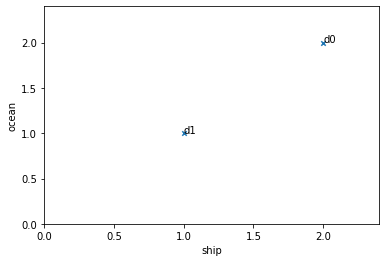

In [37]:
ax = df.plot.scatter(x='ship', y='ocean', marker='x', legend=False)
m = df.values.max(axis=None)
ax.set_xlim([0, m*1.2])
ax.set_ylim([0, m*1.2])
for label, row in df.iterrows():
        ax.text(row['ship'], row['ocean'], label)

## length of a vector 

The length of a vector $u$ is defined as 

$length(u)=\sqrt{\sum u_i^2}$



In [38]:

d1=df.loc['d1']
d0=df.loc['d0']

length=np.sqrt(d1.dot(d1))
length

1.4142135623730951

### Length normalization

A normalized vector has length one. The normalization is done by dividing the vector by the length.

In [39]:

d0_norm=d0/np.sqrt(d0.dot(d0))
d0_norm


ocean    0.707107
ship     0.707107
Name: d0, dtype: float64

In [40]:
d1_norm=d1/np.sqrt(d1.dot(d1))
d1_norm

ocean    0.707107
ship     0.707107
Name: d1, dtype: float64


$ euclidean(u,v)= \sqrt{\sum (u_i-v_i)^2} $

In [41]:
dist = scipy.spatial.distance.euclidean(d0,d1)
dist

1.4142135623730951

### Cosine similarity/distance

Cosine similarity mesures the similarity between two vectors by calculating the cosine of the angle betweeen two vectors. It ranges between -1 to 1. If the angle is zero, the cosine similarity is cosine(0)=1.  If two vectors are orthoganal, the consine similarity is cosine(90)=0. 

<img src="fig/cosine.png"/>

#### Why cosine similarity

Cosine similarity is widely used in IR. Compared with other similarity functions, e.g., Euclidean distsance, it removes the impact from document size. For instance, given a document d1, and we produce the second document d2 by copying d1 twice into d2. Intuitively, those two documents are the same. By cosine similarity, the angle of the two matrices are zero. Hence the similarity is 1. By Euclidean distance, the similarity would be small.

Cosine function also resembles the sigmoid function as shown below. 
<img src="fig/cosine2.png"/>



#### How to calculate cosine similarity 

Cosine similarity is calculated by normalized dot product. ie., 

$ cosine(u,v)=\frac{u.v}{|| u||||v||}=\frac{\sum x_i y_i}{\sqrt{\sum u_i^2}\sqrt{\sum v_i^2}} $



##### Why cosine is the normalized dot product

It can be proven using law of cosines.

In [42]:
dist =  scipy.spatial.distance.cosine(d0, d1)
dist

0.0

In [43]:
cos_sim=np.dot(d0,d1)/(np.linalg.norm(d0)*np.linalg.norm(d1))
cos_sim  

0.9999999999999998

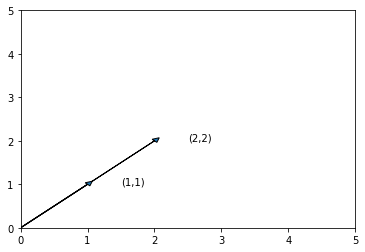

In [61]:
def plotCos(A,B):
    ax = plt.axes()
    ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.1, head_length=0.1)
    plt.annotate(f"({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))
    ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.1, head_length=0.1)
    plt.annotate(f"({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))
    plt.xlim(0,5)
    plt.ylim(0,5)
    plt.show()
    plt.close()
    
plotCos(d0,d1)
    


plotCos([1,2],[2,1])

## Matrix_reweigthing

In term-document matrix, the raw count can be reweighted. One technique is called TF-IDF reweighting. There are many variants of TF-IDF, as described in the IIR book. 


In [63]:
def tfidf(df):
    doccount = float(df.shape[1])
    freqs = df.astype(bool).sum(axis=1)
    print(freqs)
    print(doccount)
    idfs = np.log(doccount / freqs)
    idfs[np.isinf(idfs)] = 0.0  # log(0) = 0
    # Term frequencies:
    col_totals = df.sum(axis=0)
    tfs = df / col_totals
    return (tfs.T * idfs).T



In [67]:
vectorizer = CountVectorizer(min_df=1)
text = ["ship ship ocean", "ship", "wood tree", "wood ship", "tree"]
X=vectorizer.fit_transform(text)
print(X)
type(X)

df=pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names())
df = df.rename(index = lambda x: 'd'+str(x)) 
df
X=tfidf(df)
print(X)

  (0, 1)	2
  (0, 0)	1
  (1, 1)	1
  (2, 3)	1
  (2, 2)	1
  (3, 1)	1
  (3, 3)	1
  (4, 2)	1
d0    2
d1    1
d2    2
d3    2
d4    1
dtype: int64
4.0
       ocean      ship      tree      wood
d0  0.693147  0.346574  0.000000  0.000000
d1  0.000000  0.346574  0.000000  0.000000
d2  0.000000  0.000000  0.346574  0.346574
d3  0.000000  0.173287  0.000000  0.346574
d4  0.000000  0.000000  0.693147  0.000000


In [68]:
X


ocean      ship      tree      wood
d0  0.693147  0.346574  0.000000  0.000000
d1  0.000000  0.346574  0.000000  0.000000
d2  0.000000  0.000000  0.346574  0.346574
d3  0.000000  0.173287  0.000000  0.346574
d4  0.000000  0.000000  0.693147  0.000000

In [69]:
doc_trump = "Mr. Trump became president after winning the political election. Though he lost the support of some republican friends, Trump is friends with President Putin"

doc_election = "President Trump says Putin had no political interference is the election outcome. He says it was a witchhunt by political parties. He claimed President Putin is a friend who had nothing to do with the election"

doc_putin = "Post elections, Vladimir Putin became President of Russia. President Putin had served as the Prime Minister earlier in his political career"

documents = [doc_trump, doc_election, doc_putin]

In [70]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
def getMatrix(documents):
    count_vectorizer = CountVectorizer(stop_words='english')
    count_vectorizer = CountVectorizer() #TfidfVectorizer()#
    sparse_matrix = count_vectorizer.fit_transform(documents)
    doc_term_matrix = sparse_matrix.todense()
    df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names()
                    )
    return df

In [71]:
matrix=getMatrix(documents)
matrix

after  as  became  by  career  claimed  do  earlier  election  elections  \
0      1   0       1   0       0        0   0        0         1          0   
1      0   0       0   1       0        1   1        0         2          0   
2      0   1       1   0       1        0   0        1         0          1   

   ...  the  though  to  trump  vladimir  was  who  winning  witchhunt  with  
0  ...    2       1   0      2         0    0    0        1          0     1  
1  ...    2       0   1      1         0    1    1        0          1     1  
2  ...    1       0   0      0         1    0    0        0          0     0  

[3 rows x 48 columns]

In [72]:
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df, df))

[[1.         0.89442719 0.         0.63245553 0.        ]
 [0.89442719 1.         0.         0.70710678 0.        ]
 [0.         0.         1.         0.5        0.70710678]
 [0.63245553 0.70710678 0.5        1.         0.        ]
 [0.         0.         0.70710678 0.         1.        ]]


In [73]:
doc_soup = "Soup is a primarily liquid food, generally served warm or hot (but may be cool or cold), that is made by combining ingredients of meat or vegetables with stock, juice, water, or another liquid. "
doc_noodles = "Noodles are a staple food in many cultures. They are made from unleavened dough which is stretched, extruded, or rolled flat and cut into one of a variety of shapes."
doc_dosa = "Dosa is a type of pancake from the Indian subcontinent, made from a fermented batter. It is somewhat similar to a crepe in appearance. Its main ingredients are rice and black gram."
ds = [doc_trump, doc_election, doc_putin, doc_soup, doc_noodles, doc_dosa]

In [74]:
m=getMatrix(ds)
print(cosine_similarity(m, m))

[[1.         0.51480485 0.38890873 0.10101525 0.09375    0.15386436]
 [0.51480485 1.         0.38829014 0.11886433 0.04902903 0.19312182]
 [0.38890873 0.38829014 1.         0.05714286 0.10606602 0.10444659]
 [0.10101525 0.11886433 0.05714286 1.         0.25253814 0.17407766]
 [0.09375    0.04902903 0.10606602 0.25253814 1.         0.3385016 ]
 [0.15386436 0.19312182 0.10444659 0.17407766 0.3385016  1.        ]]


In [75]:
documents=[]
with open("../data/vldb.txt") as f:
    for line in f:
        tokens=re.findall('[a-zA-Z]+', line.lower())               
        documents.append(' '.join(tokens))       

In [76]:
documents[:5]

['a new service for customer care based on the trentorise bigdata platform',
 'structural trend analysis for online social networks',
 'sql aa executing sql on an asymmetric architecture',
 'scout prefetching for latent structure following queries',
 'probabilistic nearest neighbor queries on uncertain moving object trajectories']

In [77]:
df2=getMatrix(documents)
df2

aa  abduction  about  abridged  abstract  abstraction  ac  accelerated  \
0      0          0      0         0         0            0   0            0   
1      0          0      0         0         0            0   0            0   
2      1          0      0         0         0            0   0            0   
3      0          0      0         0         0            0   0            0   
4      0          0      0         0         0            0   0            0   
...   ..        ...    ...       ...       ...          ...  ..          ...   
4319   0          0      0         0         0            0   0            0   
4320   0          0      0         0         0            0   0            0   
4321   0          0      0         0         0            0   0            0   
4322   0          0      0         0         0            0   0            0   
4323   0          0      0         0         0            0   0            0   

      accelerating  acceleration  ...  ymaldb  you  your  youtopia  zero  \
0                0             0  ...       0    0     0         0     0   
1                0             0  ...       0    0     0         0     0   
2                0             0  ...       0    0     0         0     0   
3                0             0  ...       0    0     0         0     0   
4                0             0  ...       0    0     0         0     0   
...            ...           ...  ...     ...  ...   ...       ...   ...   
4319             0             0  ...       0    0     0         0     0   
4320             0             0  ...       0    0     0         0     0   
4321             0             0  ...       0    0     0         0     0   
4322             0             0  ...       0    0     0         0     0   
4323             0             0  ...       0    0     0         0     0   

      zigzag  zinc  zoning  zoo  zoom  
0          0     0       0    0     0  
1          0     0       0    0     0  
2          0     0       0    0     0  
3          0     0       0    0     0  
4          0     0       0    0     0  
...      ...   ...     ...  ...   ...  
4319       0     0       0    0     0  
4320       0     0       0    0     0  
4321       0     0       0    0     0  
4322       0     0       0    0     0  
4323       0     0       0    0     0  

[4324 rows x 4557 columns]

# Project_topics

From the term-document matrix, we have document vectors as well as word vectors. The raw-count matrix, the term-frequency count matrix, can be reweighted, resulting in different vector representations. 
<ol> 
<li> Distance functions:
<li> What reweighting techniques are better? Better for what tasks? e.g., for document vectors, which is better for document classfication? 
<li> 
<ol> 